# 1.5 Principal Component Analysis (PCA)
* PCA의 특성
 * PCA는 SVD의 주요 응용 분야야로 statistical interpertation of the data-driven, hiedrarchical coordinate system을 제공하며, 고차원의 데이터를 저차원의 데이터로 환원시키는 기법을 말한다. 
 * 이 때 서로 연관 가능성이 있는 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간(주성분)의 표본으로 변환하기 위해 직교 변환을 사용한다. 데이터를 한개의 축으로 사상시켰을 때 그 분산이 가장 커지는 축을 첫 번째 주성분, 두 번째로 커지는 축을 두 번째 주성분으로 놓이도록 새로운 좌표계로 데이터를 선형 변환한다.          

* Computation

    * 평균값 $x̄$는 다음과 같이 구할 수 있다.
    * $x̄_j=\frac1 n \displaystyle\sum_{i=0}^{n}{X_ij}$
    * 이를 행렬로 다음과 같이 나타낼 수 있다.
    * $\bar{X}=\begin{bmatrix}1\\.\\.\\.\\1 \end{bmatrix}\bar{x}$
    * 공분산 행렬 C는 symmetric하고 positive semi-definite이며 음이 아닌 실제 고유값을 갖는다.
    * 각 원소 $C_ij$는 i와 j 사이의 상관관계를 정량화한다. Principal components는는 C의 고유 벡터이며 좌표 변화를 정의한다.
    * $B=X-\bar{X}$
    * $ C=\frac{1}{n-1} B^*B$...(1)
    * 고유벡터 행렬 V의 열은 principal components이고, 대각 행렬 D의 원소는 이들 방향에 따른 데이터의 분산이다. 
    * 이 principal component coordinates에서 모든 특징들은 선형으로 서로 상관관계가 없다. principal components V의 행렬은 또한 B의 right singular 벡터의 행렬이다. 
    * $CV=VD \to C=VDV^* \to D=V^*CV$ ...(2)
     * $B = U\sum_{}V^*$를 식(1)에 대입하고 이 식을 식(2)와 비교하면 D의 digomal elements의 $λ_k를 구할 수 있다.
    * $ C=\frac{1}{n-1} B^*B=\frac{1}{n-1} V (\displaystyle\sum_{})^2V^* \to D=\frac{1}{n-1}(\displaystyle\sum_{})^2$
    * $λ_k = \frac{{σ_k}^2} {n-1}$


* Example: Noisy Gaussian Data
    * 노이즈가 많은 데이터 클라우드에서 PCA를 사용하고 표준편차를 구해 신뢰구간을 플롯하는 예제이다.
    * PCA를 사용하여 데이터를 저차원 공간으로 투영하고, 데이터의 구조와 패턴을 시각적으로 파악할 수 있다.
    * PCA결과를 통해 데이터 분포의 신뢰 구간을 시각화하여 데이터의 특성과 분포를 분석할 수 있다.
    * 데이터를 회전시켜 데이터의 주요 변동성이 주된 축을 따라 정렬되도록 만들어 PCA가 더 잘 작동하도록 한다.

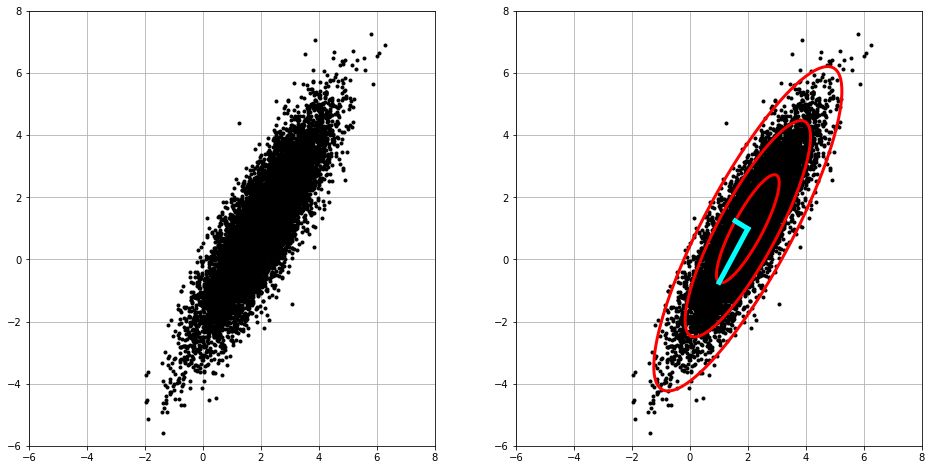

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()

* Example: Ovarian Cancer Data
    * PCA를 사용하여 고차원 데이터에서 패턴과 상관 관계를 시각화하여 유전자 데이터에서 패턴을 찾는다.
    * 환자들의 PCA결과를 3D로 플롯했을 때 난소암 환자는 암이 없는 환자와는 별도로 유전자 데이터의 교집합을 볼 수 있다.


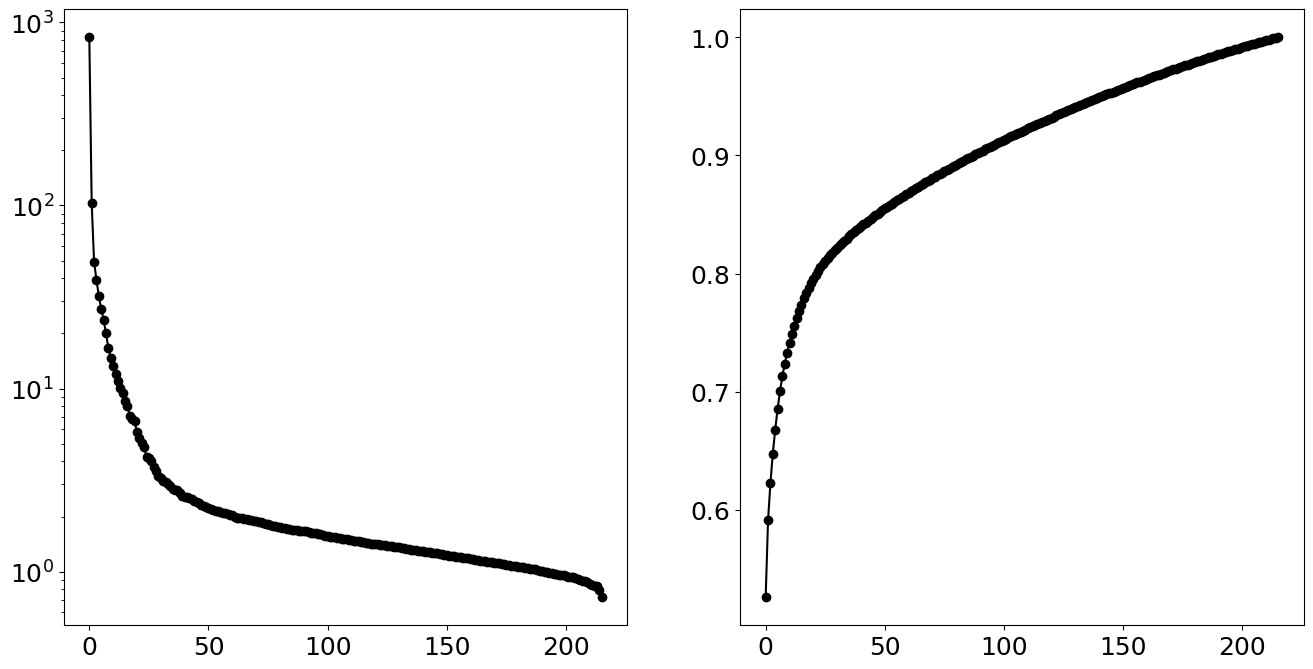

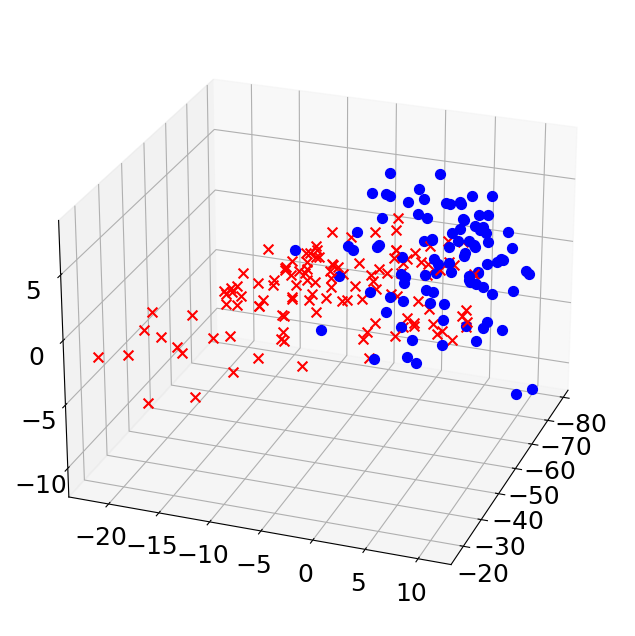

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
#난소암 환자의 데이터 로드
obs = np.loadtxt(os.path.join('..','DATA','ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join('..','DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")
#PCA 수행
U, S, VT = np.linalg.svd(obs,full_matrices=0)
#PCA 결과의 특이값에 관한 그래프
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
plt.show()
#PCA결과를 3D 공간에서 시각화하는 그래프
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()